In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=657770cfd539225805212ab1dd1e7ee2b4667fd637c59c74eadf3fe876302341
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unins

In [ ]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00


In [ ]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

from datetime import date


<ipython-input-5-4f2cb04e216b>:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-5-4f2cb04e216b>:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [ ]:
#dataframe
#df = web.DataReader('AAPL' , data_source = 'google' , start  = '2012-01-01' , end = '2019-12-17')
stock = ""
stock = input()
df = pdr.get_data_yahoo(stock, start="2012-01-01", end="2023-05-22")
df

#aapl = yf.Ticker("AAPL")
#hist = aapl.history(start  = '2012-01-01' , end = '2021-09-17')
#print(hist)

TSLA
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-05-15,167.660004,169.759995,164.550003,166.350006,166.350006,105592500
2023-05-16,165.649994,169.520004,164.350006,166.520004,166.520004,98288800
2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600


# New Section

In [ ]:
#shape
df.shape

(2864, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

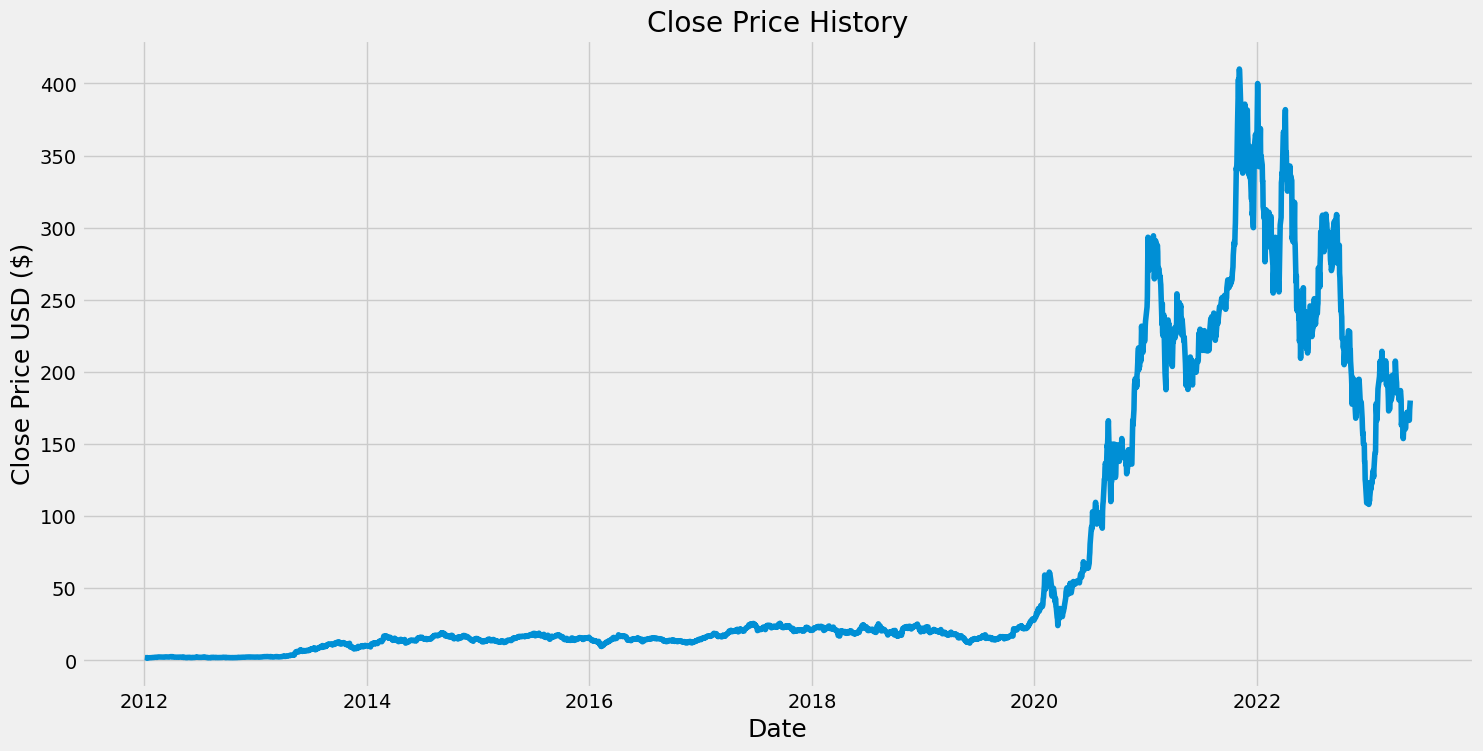

In [ ]:
#visualize the closing price history (aka, graph)
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

In [ ]:
#create a new datafram with onle the close column
data= df.filter(['Close'])
#convert to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)*0.8)

training_data_len

2292

In [ ]:
#scale the data (preprocessing?)
scaler = MinMaxScaler(feature_range = (0, 1))
#holds data set that is scaled between 0 and 1
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.42193753],
       [0.42935581],
       [0.4373127 ]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i,0]) #past values
  y_train.append(train_data[i, 0]) #prediction
 # if i <= 61:
#    print(x_train)
#    print(y_train)
#    print()


In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(2232, 60, 1)

In [ ]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

2232/2232 [==============================] - 40s 17ms/step - loss: 4.8547e-04


In [ ]:
#create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # num of samples, num of time steps, close price


In [ ]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


18/18 [==============================] - 1s 10ms/step


In [ ]:
#get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.53386373453207

<ipython-input-23-d1ea7bd74a09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


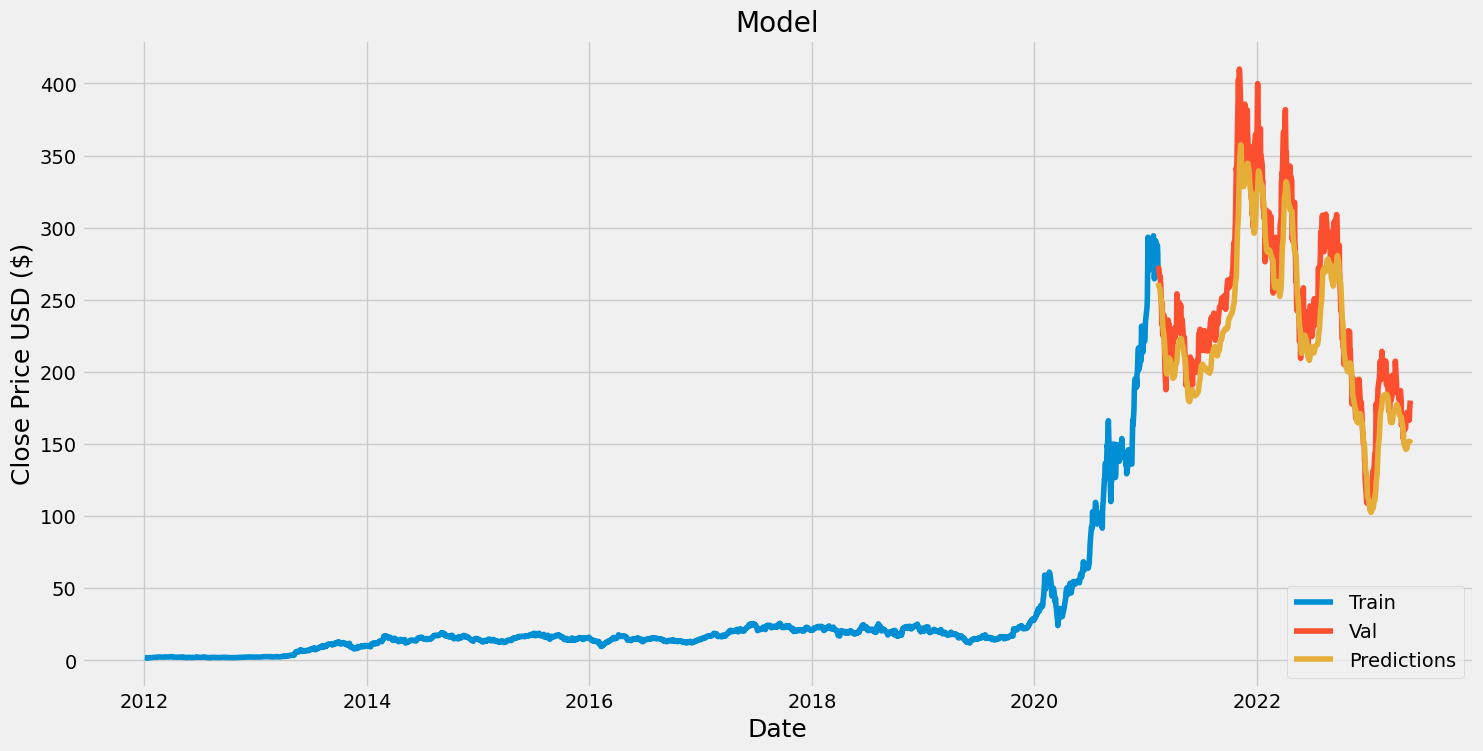

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visiualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-02-11,135.130005,132.848343
2021-02-12,135.369995,132.719543
2021-02-16,133.190002,132.593948
2021-02-17,130.839996,132.313629
2021-02-18,129.710007,131.792862
...,...,...
2023-05-15,172.070007,163.121658
2023-05-16,172.070007,163.418472
2023-05-17,172.690002,163.598465


In [ ]:
#lets predict the prices!
#step 1: get the quote
apple_quote = pdr.get_data_yahoo(stock, start="2012-01-01", end="2021-09-17")
#create a new dataframe
new_df = apple_quote.filter({'Close'})
#get the last 60 day closing price values and convert the datafram to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data set to a nump array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scale price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 23ms/step
[[229.42917]]
